In [2]:
import pandas as pd 
import boto3
import configparser
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_theme(style="darkgrid")

In [3]:
config = configparser.ConfigParser()
config.read('private.cfg')
ACCESS_KEY_ID = config.get('AWS','ACCESS_KEY_ID')
SECRET_ACCESS_KEY = config.get('AWS', 'SECRET_ACCESS_KEY')
BUCKET_NAME = config.get('AWS', 'BUCKET_NAME')
TRACKDATA = config.get('AWS', 'TRACKDATA')
ALBUMDATA = config.get('AWS', 'ALBUMDATA')

In [4]:
#extract the track data file from S3
s3_client = boto3.client(
    "s3",
    aws_access_key_id = ACCESS_KEY_ID,
    aws_secret_access_key = SECRET_ACCESS_KEY
)
response = s3_client.get_object(Bucket=BUCKET_NAME, Key=TRACKDATA)
track0 = pd.read_csv(response.get("Body"))

In [5]:
#extract the album data file from S3
s3_client = boto3.client(
    "s3",
    aws_access_key_id = ACCESS_KEY_ID,
    aws_secret_access_key = SECRET_ACCESS_KEY
)
response = s3_client.get_object(Bucket=BUCKET_NAME, Key=ALBUMDATA)
album0 = df = pd.read_csv(response.get("Body"))

In [49]:
track = track0.copy()
album = album0.copy()

In [50]:
track.head()

,Unnamed: 0,track_name,duration_ms,explicit,popularity,track_number,available_markets,artists_name,artists_id,album_id,album_name
0,0,Drip Too Hard (Lil Baby & Gunna),145542,True,85,12,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...","['Lil Baby', 'Gunna']","['5f7VJjfbwm532GiveGC0ZK', '2hlmm7s2ICUX0LVIhV...",2yXnY2NiaZk9QiJJittS81,Drip Harder
1,1,Freestyle,162053,True,84,13,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",['Lil Baby'],['5f7VJjfbwm532GiveGC0ZK'],750APP0eKVlcgOxaZnBnVt,Too Hard
2,2,Pure Cocaine,154023,True,83,2,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",['Lil Baby'],['5f7VJjfbwm532GiveGC0ZK'],4iF44RCCybJtkBkMoqrLW2,Street Gossip
3,3,Yes Indeed,142273,True,83,5,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...","['Lil Baby', 'Drake']","['5f7VJjfbwm532GiveGC0ZK', '3TVXtAsR1Inumwj472...",7yf9ZJyHRbp8sHtpDKfPpt,Harder Than Ever
4,4,Low Down,144651,True,81,23,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",['Lil Baby'],['5f7VJjfbwm532GiveGC0ZK'],6uhEg4ASZYLIilZFCBFy1r,My Turn (Deluxe)


In [51]:
album.head()

,Unnamed: 0,id,name,type,release_date,available_markets,total_tracks,label,popularity,artist_name,artist_id
0,0,0FYvMdfTfYJxnJnKs1wDb0,It's Only Me,album,2022-10-14,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",23,Quality Control Music/Motown Records,77,['Lil Baby'],['5f7VJjfbwm532GiveGC0ZK']
1,1,2yXnY2NiaZk9QiJJittS81,Drip Harder,album,2018-10-05,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",13,Quality Control Music/Young Stoner Life Record...,77,"['Lil Baby', 'Gunna']","['5f7VJjfbwm532GiveGC0ZK', '2hlmm7s2ICUX0LVIhV..."
2,2,7yf9ZJyHRbp8sHtpDKfPpt,Harder Than Ever,album,2018-05-18,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",17,"Quality Control Music, LLC",76,['Lil Baby'],['5f7VJjfbwm532GiveGC0ZK']
3,3,4iF44RCCybJtkBkMoqrLW2,Street Gossip,album,2018-11-30,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",13,Quality Control Music/Motown Records/Capitol R...,75,['Lil Baby'],['5f7VJjfbwm532GiveGC0ZK']
4,4,6uhEg4ASZYLIilZFCBFy1r,My Turn (Deluxe),album,2020-05-01,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",26,Quality Control/Motown Records,75,['Lil Baby'],['5f7VJjfbwm532GiveGC0ZK']


In [52]:
#delete unnecesary column
track = track.drop('Unnamed: 0', axis = 1)
album = album.drop('Unnamed: 0', axis = 1)

In [53]:
#quick view of the column type
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   track_name         950 non-null    object
 1   duration_ms        950 non-null    int64 
 2   explicit           950 non-null    bool  
 3   popularity         950 non-null    int64 
 4   track_number       950 non-null    int64 
 5   available_markets  950 non-null    object
 6   artists_name       950 non-null    object
 7   artists_id         950 non-null    object
 8   album_id           950 non-null    object
 9   album_name         950 non-null    object
dtypes: bool(1), int64(3), object(6)
memory usage: 67.8+ KB


In [54]:
#quick view of the column type
album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 150 non-null    object
 1   name               150 non-null    object
 2   type               150 non-null    object
 3   release_date       150 non-null    object
 4   available_markets  150 non-null    object
 5   total_tracks       150 non-null    int64 
 6   label              150 non-null    object
 7   popularity         150 non-null    int64 
 8   artist_name        150 non-null    object
 9   artist_id          150 non-null    object
dtypes: int64(2), object(8)
memory usage: 11.8+ KB


In [55]:
track.rename(columns={'artists_name': 'artist_name', 'artists_id': 'artist_id'}, inplace=True) #remove the 's'

In [56]:
#clean the artist_name, artist_id and available_markets columns in the 2 dataframe, because there are not in form of list
char_to_strip = ["[", "]", "'",'"']
for char in char_to_strip : 
    for column in ['artist_name', 'artist_id', 'available_markets']:
        #track
        track[column] = track[column].str.replace(char, '')
        #album
        album[column] = album[column].str.replace(char, '')


C:\Users\Acer\AppData\Local\Temp\ipykernel_29676\3211898948.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Acer\AppData\Local\Temp\ipykernel_29676\3211898948.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [57]:
track.head()

,track_name,duration_ms,explicit,popularity,track_number,available_markets,artist_name,artist_id,album_id,album_name
0,Drip Too Hard (Lil Baby & Gunna),145542,True,85,12,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...","Lil Baby, Gunna","5f7VJjfbwm532GiveGC0ZK, 2hlmm7s2ICUX0LVIhVFlZQ",2yXnY2NiaZk9QiJJittS81,Drip Harder
1,Freestyle,162053,True,84,13,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...",Lil Baby,5f7VJjfbwm532GiveGC0ZK,750APP0eKVlcgOxaZnBnVt,Too Hard
2,Pure Cocaine,154023,True,83,2,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...",Lil Baby,5f7VJjfbwm532GiveGC0ZK,4iF44RCCybJtkBkMoqrLW2,Street Gossip
3,Yes Indeed,142273,True,83,5,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...","Lil Baby, Drake","5f7VJjfbwm532GiveGC0ZK, 3TVXtAsR1Inumwj472S9r4",7yf9ZJyHRbp8sHtpDKfPpt,Harder Than Ever
4,Low Down,144651,True,81,23,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...",Lil Baby,5f7VJjfbwm532GiveGC0ZK,6uhEg4ASZYLIilZFCBFy1r,My Turn (Deluxe)


In [59]:
#remove tracks, and albums that don't belong to Lil baby

#in tracks data
for i in (range(track.shape[0])): 
    if "Lil Baby" not in track.loc[i, 'artist_name'].split(', '): 
        track = track.drop(i)
track = track.reset_index(drop=True)

#in albums data
for i in range(album.shape[0]) : 
    if "Lil Baby" not in album.loc[i,'artist_name'].split(', '): 
        album = album.drop(i)
album = album.reset_index(drop=True)

In [60]:
# remove "single" type from the album data
album = album[album['type'].str.contains('album')]
album = album.reset_index(drop=True)

In [61]:
#remove duplicated from the two datasets 
track = track.drop_duplicates(subset=['track_name'])

album = album.drop_duplicates(subset=['name'])

In [62]:
print(f"No tracks: {track.shape[0]}\nNo albums: {album.shape[0]}")

No tracks: 199
No albums: 11


### Top tracks and Top albums

In [63]:
# best songs in term of popularity 
track.nlargest(5, 'popularity')

,track_name,duration_ms,explicit,popularity,track_number,available_markets,artist_name,artist_id,album_id,album_name
0,Drip Too Hard (Lil Baby & Gunna),145542,True,85,12,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...","Lil Baby, Gunna","5f7VJjfbwm532GiveGC0ZK, 2hlmm7s2ICUX0LVIhVFlZQ",2yXnY2NiaZk9QiJJittS81,Drip Harder
1,Freestyle,162053,True,84,13,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...",Lil Baby,5f7VJjfbwm532GiveGC0ZK,750APP0eKVlcgOxaZnBnVt,Too Hard
2,Pure Cocaine,154023,True,83,2,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...",Lil Baby,5f7VJjfbwm532GiveGC0ZK,4iF44RCCybJtkBkMoqrLW2,Street Gossip
3,Yes Indeed,142273,True,83,5,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...","Lil Baby, Drake","5f7VJjfbwm532GiveGC0ZK, 3TVXtAsR1Inumwj472S9r4",7yf9ZJyHRbp8sHtpDKfPpt,Harder Than Ever
4,Low Down,144651,True,81,23,"AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...",Lil Baby,5f7VJjfbwm532GiveGC0ZK,6uhEg4ASZYLIilZFCBFy1r,My Turn (Deluxe)


Top Lil Baby's songs are Drip too hard, Freestyle, Pure cocaine, Yes indeed, Low Down 

In [64]:
# best albums 
album.nlargest(5, 'popularity')

,id,name,type,release_date,available_markets,total_tracks,label,popularity,artist_name,artist_id
0,0FYvMdfTfYJxnJnKs1wDb0,It's Only Me,album,2022-10-14,"AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB...",23,Quality Control Music/Motown Records,77,Lil Baby,5f7VJjfbwm532GiveGC0ZK
1,2yXnY2NiaZk9QiJJittS81,Drip Harder,album,2018-10-05,"AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB...",13,Quality Control Music/Young Stoner Life Record...,77,"Lil Baby, Gunna","5f7VJjfbwm532GiveGC0ZK, 2hlmm7s2ICUX0LVIhVFlZQ"
2,7yf9ZJyHRbp8sHtpDKfPpt,Harder Than Ever,album,2018-05-18,"AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB...",17,"Quality Control Music, LLC",76,Lil Baby,5f7VJjfbwm532GiveGC0ZK
3,4iF44RCCybJtkBkMoqrLW2,Street Gossip,album,2018-11-30,"AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB...",13,Quality Control Music/Motown Records/Capitol R...,75,Lil Baby,5f7VJjfbwm532GiveGC0ZK
4,6uhEg4ASZYLIilZFCBFy1r,My Turn (Deluxe),album,2020-05-01,"AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB...",26,Quality Control/Motown Records,75,Lil Baby,5f7VJjfbwm532GiveGC0ZK


Top Lil baby's albums are It's only me, Drip Harder, Harder Than Ever, Street Gossip and My turn(Deluxe)

### Frequency of Featuring Artists with Lil Baby

In [72]:
#best featuring 
artist_frequency = {}

# Iterate through each row in the DataFrame
for index, row in track.iterrows():
    artists = row['artist_name'].split(', ')
    if 'Lil Baby' in artists:
        artists.remove('Lil Baby')  # Remove Lil Baby from the list
        for artist in artists:
            if artist in artist_frequency:
                artist_frequency[artist] += 1
            else:
                artist_frequency[artist] = 1
artist_frequency

{'Gunna': 18,
 'Drake': 2,
 'Lil Durk': 23,
 'Polo G': 1,
 'Lil Uzi Vert': 2,
 '42 Dugg': 4,
 'Fridayy': 1,
 'Young Thug': 9,
 'Nardo Wick': 1,
 'Travis Scott': 1,
 'EST Gee': 2,
 'Veeze': 1,
 'Moneybagg Yo': 3,
 'Future': 3,
 'NAV': 1,
 'Pooh Shiesty': 1,
 'Meek Mill': 2,
 'Gucci Mane': 2,
 'Offset': 3,
 'Rod Wave': 1,
 'Lil Dann': 2,
 'Rylo Rodriguez': 3,
 'Lil Wayne': 2,
 'Big Sean': 1,
 'Lil Tjay': 1,
 'Starlito': 1,
 'Jeremih': 1,
 'Megan Thee Stallion': 2,
 'Lil Yachty': 6,
 'NoCap': 1,
 'Lil Keed': 1,
 'Young Dolph': 1,
 '2 Chainz': 1,
 'Lil Mosey': 2,
 'Kirk Franklin': 2,
 'HoodRich Pablo Juan': 1,
 'Lil Kee': 1,
 'Marlo': 11,
 'The Martinez Brothers': 1,
 'Lil Gotit': 1,
 '4PF DT': 1,
 'Ryan Adams': 2,
 'Skull-E': 1,
 'Telvis Lawler Jr': 1,
 'TK Kravitz': 1,
 'Ali Tomineek': 1,
 'Shad On The Beat': 1,
 'Lil Muk': 1,
 'YXNG K.A': 1,
 'Bite Da Don': 1,
 'PnB Rock': 1,
 'Lil Zack': 1,
 'Lil Bam': 1,
 'Duke': 1,
 'Yogi': 2,
 'Young Scooter': 1,
 'Lil Jairmy': 1,
 'Big36oz': 1,
 'K

In [73]:
# Convert the dictionary to a DataFrame
artist_df = pd.DataFrame(list(artist_frequency.items()), columns=['featuring_artist', 'frequency'])

# Sort the DataFrame by frequency
artist_df = artist_df.sort_values(by='frequency', ascending=False)

#reset index 
artist_df = artist_df.reset_index(drop=True)

In [74]:
artist_df.head()

,featuring_artist,frequency
0,Lil Durk,23
1,Gunna,18
2,Marlo,11
3,Young Thug,9
4,Lil Yachty,6


In [86]:
fig = px.bar(artist_df.head(10), x='featuring_artist', y='frequency', template='simple_white')
fig.update_layout(
    title = 'Frequency of Featuring Artists with Lil Baby', 
    xaxis_title='Artists'
)
fig.show()

The Top 5 Lil baby's featuring is with Lil Durk, Gunna, Marlo, Young Thug and Lil Yatchy 

### Popularity distribution

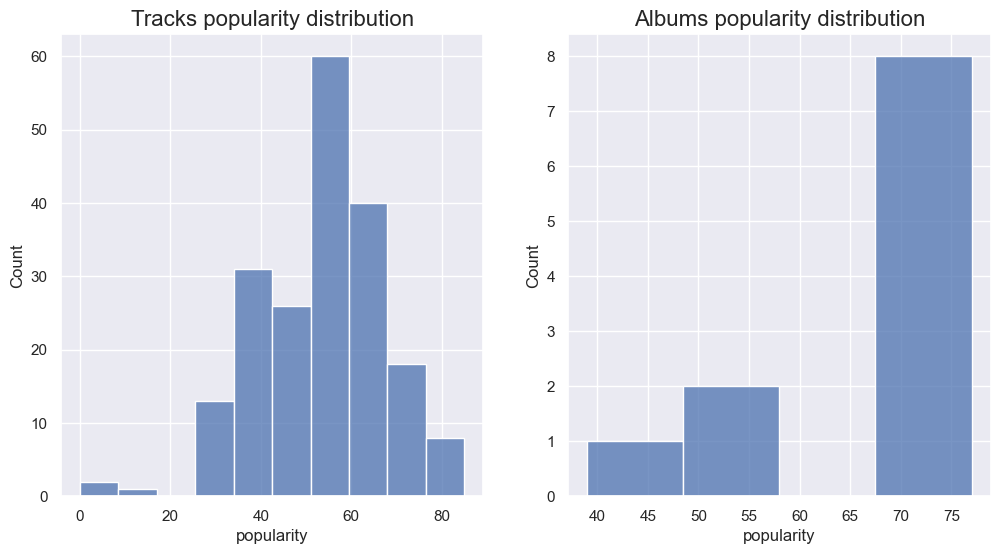

In [43]:
# Tracks and albums popularity distribution

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Create a histogram plot in each subplot
sns.histplot(data = track, ax=axes[0], x='popularity',bins=10)  # track
sns.histplot(data = album, ax=axes[1], x='popularity',bins=4)  # album 

# Set titles for subplots
axes[0].set_title('Tracks popularity distribution', fontdict={'fontsize': 16})
axes[1].set_title('Albums popularity distribution', fontdict={'fontsize': 16})

plt.show()

Lil Baby's tracks popularity are usually between 50 and 70. Most of Lil Baby's album are around 70 and 75 in term of popularity

### Relationship between duration_ms and popularity

In [44]:
# for the tracks data
fig = px.scatter(track, x="duration_ms", y="popularity", trendline="ols", template='simple_white')
fig.show()

There are not relevant correlation between these two variables.